# TP Informatique n°5 : Recherche dans une liste

## Exercice 1

### Question 1

In [1]:
def recherche(x, L):
    """Renvoie True si x est dans la liste L, False sinon"""
    for e in L:
        if x == e:
            return True
    return False

In [2]:
def recherche(x, L):
    """Renvoie True si x est dans la liste L, False sinon"""
    n = len(L)
    i = 0
    while i < n and L[i] != x:
        i = i + 1
    return i < n

### Question 2
Soit $n$ la longueur de la liste $L$. Dans le pire des cas, l'élément n'est pas dans la liste et on effectue $n$ accès à la liste $L$.

### Question 3

In [3]:
def recherche2(x, L):
    """Renvoie l'indice de x si x est dans la liste L, None sinon"""
    for i in range(L):
        if x == L[i]:
            return i
    return None

In [4]:
def recherche2(x, L):
    """Renvoie l'indice de x si x est dans la liste L, None sinon"""
    n = len(L)
    i = 0
    while i < n and L[i] != x:
        i = i + 1
    if i < n:
        return i
    else:
        return None

## Exercice 2

### Question 1

In [5]:
def recherche(x, L):
    """Renvoie True si x est dans la liste triée L, False sinon"""
    for e in L:
        if x == e:
            return True
        elif x < e:
            # x ne pouvait que se trouver avant e
            return False
    return False    

In [6]:
def recherche(x, L):
    """Renvoie True si x est dans la liste triée L, False sinon"""
    n = len(L)
    i = 0
    while i < n and L[i] < x:
        i = i + 1
    return (i < n and L[i] == x)

### Question 2

In [7]:
def dichotomie(x, L):
    """Renvoie True si x est dans la liste triée L, False sinon, en utilisant la méthode par dichotomie"""
    g = 0
    d = len(L) - 1
    
    # Tant qu'il y a au moins 2 éléments dans la portion de liste [L[g],..L[d]] considérée 
    while d > g:
        m = (g + d)//2 # m < d
        if x <= L[m]:
            # x ne peut se trouver que dans [L[g],...,L[m]]
            d = m
        else:
            # x ne peut se trouver que dans [L[m+1],...L[d]]
            g = m+1
    # On sort de la boucle : d <= g, il reste au plus un élément qui aurait alors pour indice g
    return L[g] == m

Une variante en excluant l'indice de fin, en sortant de la fonction si l'élément est trouvé et en sortant de la boucle uniquement s'il n'y a plus d'élément dans la portion considérée.

In [8]:
def dichotomie(x, L):
    """Renvoie True si x est dans la liste triée L, False sinon, en utilisant la méthode par dichotomie"""
    g = 0
    d = len(L)
    
    # Tant qu'il y a au moins 1 élément dans la portion de liste [L[g],..L[d-1]] considérée 
    while d > g:
        m = (g + d)//2 # m < d
        if x == L[m]:
            return True
        elif x < L[m]:
            # x ne peut se trouver que dans [L[g],...,L[m-1]]
            d = m
        else:
            # x ne peut se trouver que dans [L[m+1],...L[d-1]]
            g = m+1
    # On sort de la boucle : la portion de liste considérée est vide, x n'est pas dans la liste
    
    return False

A chaque étape la longueur de la portion de liste est divisée par 2, donc pour une liste de longueur $2^n$ on aura au plus $n+1$ étapes avec la deuxième fonction ($n$ avec la première).

Pour une liste quelconque de longueur $2^n$, la recherche d'un élément peut nécessiter jusqu'à $2^n$ étapes, donc pour $n$ grand, la recherche par dichotomie sera plus efficace dans le pire des cas.

### Question 3

In [9]:
from time import perf_counter

In [10]:
help(perf_counter)

Help on built-in function perf_counter in module time:

perf_counter(...)
    perf_counter() -> float
    
    Performance counter for benchmarking.



In [11]:
def chrono_recherche():
    
    L = [2*k for k in range(10**7)]
    x = 10**7
    t0 = perf_counter()
    reponse = recherche(x, L)
    t1 = perf_counter() 
    return reponse, t1 - t0

In [12]:
print(chrono_recherche())

(True, 0.7315341000000002)


In [13]:
def chrono_dichotomie():
    
    L = [2*k for k in range(10**7)]
    x = 10**7
    t0 = perf_counter()
    reponse = dichotomie(x, L)
    t1 = perf_counter() 
    return reponse, t1 - t0

In [14]:
print(chrono_dichotomie())

(True, 8.100000000510477e-06)


## Exercice 3

In [15]:
from math import floor

def interpolation(x, L):
    """ Fonction retournant True si x est dans la liste L, False sinon """
    """ Utilise la methode d'interpolation linéaire """
    g = 0
    d = len(L)-1
    
    cpt = 0
    
    while d-g+1 >= 1:
        
        cpt = cpt + 1
        
        # S'il reste un seul élément : on teste s'il s'agit de x
        if g == d:
            return L[g] == x, cpt
        
        i = floor(g + (d-g)*(x-L[g])/(L[d]-L[g]))
        
        # Si i < g ou i > d, x n'est pas entre les indices g et d, donc n'est pas dans la liste
        if i < g or i > d:
            return False, cpt
        if x == L[i]:
            return True, cpt
        elif x < L[i]:
            d = i-1
        else:
            g = i+1
    return False, cpt

In [16]:
def chrono_interpolation():
    
    L = [2*k for k in range(10**7)]
    x = 10**7
    t0 = perf_counter()
    reponse = interpolation(x, L)
    t1 = perf_counter() 
    return reponse, t1 - t0

In [17]:
print(chrono_interpolation())

((True, 1), 1.970000000017791e-05)


In [18]:
from time import perf_counter 
def chrono():
    L = [i**3 for i in range(0, 10000001)]
    e = 9990000**3
    t0 = perf_counter()
    reponse = recherche(e, L)
    t1 = perf_counter() 
    reponse = dichotomie(e, L)
    t2 = perf_counter() 
    reponse = interpolation(e, L)
    t3 = perf_counter() 
    return t1-t0, t2-t1, t3-t2

In [19]:
print(chrono())

(1.4627455000000005, 1.8300000000692762e-05, 1.9899999999850593e-05)


## Exercice 4

In [20]:
from dataRC import *

In [21]:
import numpy as np
import matplotlib.pyplot as plt

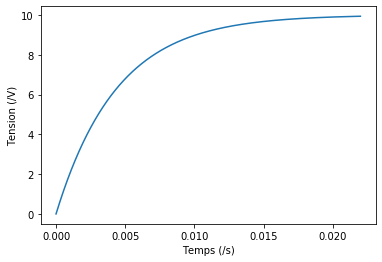

In [22]:
plt.plot(les_T, les_U, label="Données")
plt.xlabel("Temps (/s)")
plt.ylabel("Tension (/V)")
plt.show()

In [23]:
u_tau = E*(1-np.exp(-1))

In [24]:
def interpolation(x, L):
    """Renvoie le plus grand indice i tel que L[i] <= x (s'il existe) et un booléen indiquant si x est dans la liste"""
    g = 0
    d = len(L)-1
    
    while d-g+1 >= 1:
        
        # S'il reste un seul élément : on teste s'il s'agit de x
        if g == d:
            return g, L[g] == x
        
        i = floor(g + (d-g)*(x-L[g])/(L[d]-L[g]))
        
        # Si i < g ou i > d, x n'est pas entre les indices g et d, donc n'est pas dans la liste
        if i < g:
            return g-1, False
        if i > d:
            return d, False
        if x == L[i]:
            return i, True
        elif x < L[i]:
            d = i-1
        else:
            g = i+1
    return d, False

In [25]:
i_tau = interpolation(u_tau, les_U)[0]

In [26]:
tau = les_T[i_tau]
print(tau)

0.004399119956


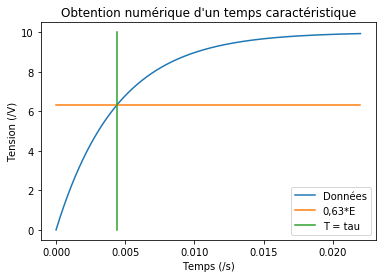

In [27]:

plt.plot(les_T,les_U,label="Données")
plt.plot([les_T[0],les_T[-1]],[u_tau,u_tau],label="0,63*E")
plt.plot([les_T[i_tau],les_T[i_tau]],[0,E],label="T = tau")
plt.legend(loc="best")
plt.title("Obtention numérique d'un temps caractéristique")
plt.xlabel("Temps (/s)")
plt.ylabel("Tension (/V)")
plt.show()